# **Topic 3  Clustering Analysis With Kmeans**
---

## **Lecture Note**
---


1.   [pdf](https://drive.google.com/file/d/15kvz7HXdEKTkqqtDcmTmCFezzVyxSzju/view?usp=sharing)
2.   [Jamboard]()



## **Python Code**
---

### **A financial data example**
---

1. The financial performance data from January 1981 issue of *Forbes*.

2. Table shows the data for 25 companies from three industries:
    - chemical companies (the first 14)
    - health care companies (15-19)
    - supermakert companies (20-25)

3. Background of these companies
    - Among the chemical companies, all of the large diversified firms were selected.
    - From the major supermarket chains, the top six rated for return on equity were included.
    - In the health care industry, four of the five companies included were those connected with hospital management; the remaining company involves hospital supplies and equipment (company 19).

In [ ]:
# Import the data
import pandas as pd
# Graph plotting
import matplotlib.pyplot as plt
# Disable warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
from google.colab import data_table
# if you run this notebook locally on your laptop, please delete this cell
# enable interactive format for DataFrame
data_table.enable_dataframe_formatter() 
# disable interactive format for DataFrame
#data_table.disable_dataframe_formatter()

In [ ]:
url = 'https://drive.google.com/file/d/1sKvxZ3N0L0ESnqVMsJHalNLy-yd9cAGR/view?usp=sharing'
data_path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]


In [ ]:
Forbes = pd.read_csv(data_path)
Forbes.index += 1
Forbes.head()

,TYPE,SYMBOL,OBSNO,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1
1,Chem,dia,1,13.0,0.7,20.2,15.5,7.2,9,0.426398
2,Chem,dow,2,13.0,0.7,17.2,12.7,7.3,8,0.380693
3,Chem,stf,3,13.0,0.4,14.5,15.1,7.9,8,0.406780
4,Chem,dd,4,12.2,0.2,12.9,11.1,5.4,9,0.568182
5,Chem,uk,5,10.0,0.4,13.6,8.0,6.7,5,0.324544


<font color='red' size=5>Details of the variables</font>

- P/E: price-to-earnings ratio, which is the price of one share of common stock divided by the earnings per share for the last year. The ratio shows the dollar amount investors are willing to pay for the stock per dollar of current earnings of the company.

- ROR5: percent rate of return on total capital (invested plus debt) averaged over the past five years.

- D/E: debt-to-equity (invested capital) ratio for the last year. This ratio indicates the extent to which management is using borrowed funds to operate the company.

- SALESGR5: percent annual compound growth rate of sales, computed from the most recent five years compared with the previous five years.

- EPS5: percent annual compound growth in earnings per share, computed from the most recent five years compared with the previous five years.

- NPM1: percent net profit margin, which is the net profits divided by the net sales for the past year, expressed as a percentage.

- PAYOUTR1: annual dividend divided by the lastest 12-month earnings per share. 
    This value represents the proportion of earnings paid out to shareholders rather than to operate and expand the company.

### **Standardizing the variables**
---

In [ ]:
# standardization of the continuous variables
X = Forbes.iloc[:, 3:].values
# import the function StandardScaler
from sklearn.preprocessing import StandardScaler
# fit_transform means to fit the model by the data and then transform 
# the data by the fitted model
X_scaled = StandardScaler().fit_transform(X) 
# make is as the dataframe
X_d = pd.DataFrame(X_scaled, columns=['ROR5', 'DE', 'SALESGR5', 'EPS5', 'NPM1', 'PE', 'PAYOUTR1'], index= range(1, 26))

In [ ]:
X_d.head()

,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1
1,0.982788,-0.007511,0.437915,0.283215,1.315877,-0.242222,0.153676
2,0.982788,-0.007511,0.051519,-0.058008,1.361314,-0.451035,-0.221020
3,0.982788,-0.570864,-0.296236,0.234469,1.633941,-0.451035,-0.007155
4,0.674221,-0.946433,-0.502314,-0.252993,0.497997,-0.242222,1.316042
5,-0.174341,-0.570864,-0.412155,-0.630776,1.088688,-1.077472,-0.681338


### **K-means**
---

How to choose $k$? Use Elbow rule.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wss = [ ]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_d)
    wss.append(kmeans.inertia_)

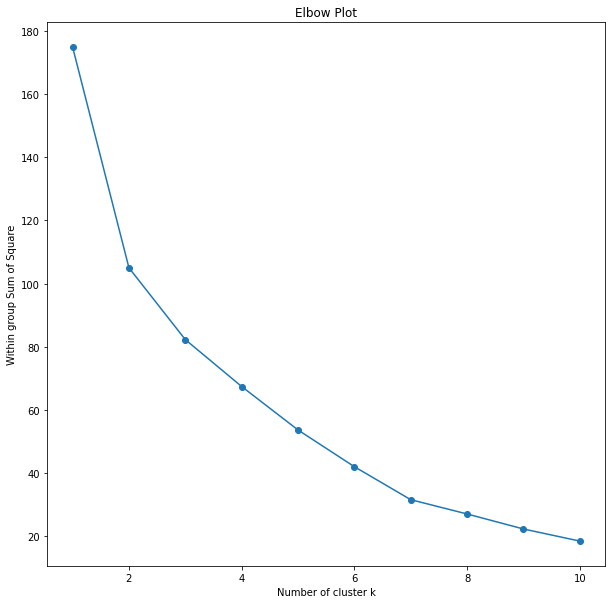

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(1, 11), wss, '-o')
plt.title('Elbow Plot')
plt.xlabel('Number of cluster k')
plt.ylabel('Within group Sum of Square')
plt.show()

Let us pick $K=3$ and run the $K$-means algorithm.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.predict(X_scaled)

In [ ]:
print(kmeans_labels)

[1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 1 1 2 2 2 2]


In [ ]:
Forbes['kmeans_label'] = kmeans_labels

In [ ]:
Forbes.groupby('kmeans_label').mean()

,OBSNO,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1
kmeans_label,,,,,,,,
0,16.5,8.875000,1.475000,32.100000,26.100000,5.850000,20.250000,0.289629
1,10.0,13.957143,0.457143,15.871429,13.400000,5.228571,9.285714,0.463828
2,13.5,9.150000,0.607143,12.892857,9.371429,3.400000,7.714286,0.413286


In [ ]:
Forbes.groupby('kmeans_label').std()

,OBSNO,ROR5,DE,SALESGR5,EPS5,NPM1,PE,PAYOUTR1
kmeans_label,,,,,,,,
0,1.290994,0.340343,0.826136,8.589529,5.643285,0.741620,1.500000,0.095025
1,9.416298,2.169376,0.237045,2.320714,2.136976,2.665655,2.138090,0.118959
2,7.057457,1.233351,0.368916,2.735089,7.281740,1.957628,1.815683,0.118231


# **In-Class Practice**
---

1.    [Problems](https://docs.google.com/document/d/1WD_Y7dHL90VtFm9xl7BMOjqNvXqjvs8c/edit)
1.   [Attached notebook](https://colab.research.google.com/drive/1Nf6Pb6RUwkrV2CqETejVL1Pqfl4eeLQw#scrollTo=mBJaOhmVdQy-)




# **Topic Question for the Final**
---




1.   [Problem set](https://docs.google.com/document/d/1i-7sZlyi6LblmeWxfwNvG-VcIdLXJZ8i/edit?usp=sharing&ouid=104281439514443270362&rtpof=true&sd=true)


